<div style=" background-color: RGB(109,7,26);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python</h2>
</div>

<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> Importation des librairies</h3>
</div>

In [1]:
# Importation de la librairie Pandas
import pandas as pd

In [2]:
# Importation de la librairie Numpy
import numpy as np

In [3]:
# Importation de la librairie Matplotlib
import matplotlib.pyplot as plt

In [4]:
# Importation de la librairie Seaborn
import seaborn as sns

In [5]:
# Importation de la librairie Scipy
import scipy.stats as stats

In [6]:
# Importation de la librairie Statsmodels
import statsmodels.api as smi

<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> Chargement des fichiers Excel</h3>
</div>

In [7]:
# Importation du fichier_erp
data_erp = pd.read_excel('Fichier_erp.xlsx')

# Importation du fichier_web
data_web = pd.read_excel('Fichier_web.xlsx')

# Importation du fichier de liaison
liaison_pd = pd.read_excel('fichier_liaison.xlsx')

C:\Users\pauli\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\pauli\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\pauli\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(127,23,52);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Contrôle, nettoyage et modification des jeux de données</h2>
</div>

In [8]:
# Contrôler la dimension du tableau de liaison
print('Le tableau de liaison comporte {} observation(s) ou article(s).'
      .format(liaison_pd.shape[0]))

print('Le tableau de liaison comporte {} colonne(s).'
      .format(liaison_pd.shape[1]))

print('Le tableau de liaison comporte {} identifiants produits uniques.'
      .format(liaison_pd.product_id.nunique()))

print('Le tableau de liaison comporte {} identifiants produits (sku) uniques.'
      .format(liaison_pd.id_web.nunique()))

Le tableau de liaison comporte 825 observation(s) ou article(s).
Le tableau de liaison comporte 2 colonne(s).
Le tableau de liaison comporte 825 identifiants produits uniques.
Le tableau de liaison comporte 734 identifiants produits (sku) uniques.


In [9]:
# Contrôler la dimension du tableau WEB + définition de la jointure
print('Le fichier WEB comporte {} observation(s) ou article(s).'
      .format(data_web.shape[0]))

print('Le fichier WEB comporte {} colonne(s).'
      .format(data_web.shape[1]))

print('Le fichier WEB comporte {} identifiants produits (sku) uniques.'
      .format(data_web.sku.nunique()))

Le fichier WEB comporte 1513 observation(s) ou article(s).
Le fichier WEB comporte 28 colonne(s).
Le fichier WEB comporte 714 identifiants produits (sku) uniques.


In [10]:
# Contrôler la dimension du tableau ERP + définition de la jointure
print('Le fichier ERP comporte {} observation(s) ou article(s).'
      .format(data_erp.shape[0]))

print('Le fichier ERP comporte {} colonne(s).'
      .format(data_erp.shape[1]))

print('Le fichier ERP comporte {} identifiants produits uniques.'
      .format(data_erp.product_id.nunique()))

print('Le tableau de liaison comporte {} identifiants produits uniques, '
      'une inner join pourra être réalisée avec le fichier ERP.'
      .format(liaison_pd.product_id.nunique()))

Le fichier ERP comporte 825 observation(s) ou article(s).
Le fichier ERP comporte 5 colonne(s).
Le fichier ERP comporte 825 identifiants produits uniques.
Le tableau de liaison comporte 825 identifiants produits uniques, une inner join pourra être réalisée avec le fichier ERP.


In [11]:
# Contrôler l'unicité des valeurs de product_id du tableau ERP
unicite_erp = sum(data_erp.product_id.value_counts() > 1)
print('Product Id contient', unicite_erp, 'valeurs en double')

Product Id contient 0 valeurs en double


In [12]:
# Contrôler l'unicité des valeurs de sku du tableau WEB
unicite_sku = sum(data_web.sku.value_counts() > 1)
print('SKU contient', unicite_sku, 'valeurs en double, des recherches '
      'supplémentaires doivent être menées pour trouver la raison de ces doublons.')

SKU contient 714 valeurs en double, des recherches supplémentaires doivent être menées pour trouver la raison de ces doublons.


In [13]:
# Contrôler l'unicité des valeurs de product_id du tableau de liaison
unicite_liaison = sum(liaison_pd.product_id.value_counts() > 1)
print('Product Id contient', unicite_liaison, 'valeurs en double' )

Product Id contient 0 valeurs en double


In [14]:
# Fichier web : stocker les lignes dont product SKU = 0 et total_sales > 0 dans un df
sku_null = data_web.loc[(data_web['sku'].isnull()) 
                        & (data_web['total_sales'] > 0)]
sku_null

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [15]:
# Fichier web : supprimer les lignes dont le SKU est vide
data_web.dropna(subset=['sku'], inplace=True)
data_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [16]:
# Contrôler les dimensions du tableau WEB après suppression des lignes dont SKU = 0
print('Le fichier web comporte {} observation(s) ou article(s)'
      .format(data_web.shape[0]))

print('Le fichier web comporte {} colonne(s)'
      .format(data_web.shape[1]))

print('Le fichier web comporte {} identifiants produits (sku) uniques'
      .format(data_web.sku.nunique()))

Le fichier web comporte 1428 observation(s) ou article(s)
Le fichier web comporte 28 colonne(s)
Le fichier web comporte 714 identifiants produits (sku) uniques


In [17]:
# Fichier web : stocker les lignes dont product type = attachment (image) dans un df
data_web_attachment = data_web.loc[(data_web['post_type'] == 'attachment')]

In [18]:
# Fichier web : supprimer les lignes dont product type = attachment dans le df ( = unicité de sku)
data_web.drop(data_web[(data_web['post_type'] == 'attachment')].index, 
              inplace=True)

In [19]:
# Contrôler l'unicité des valeurs de sku après suppression des lignes "attachment"
unicite_sku = sum(data_web.sku.value_counts() > 1)
print('Les doublons ont été identifiés et supprimés, '
      'sku contient désormais', unicite_sku, 'valeurs en double.')

Les doublons ont été identifiés et supprimés, sku contient désormais 0 valeurs en double.


In [20]:
# Contrôler les dimensions du tableau WEB après suppression des lignes "attachment"
print('Le fichier web comporte {} observation(s) ou article(s)'
      .format(data_web.shape[0]))

print('Le fichier web comporte {} colonne(s)'
      .format(data_web.shape[1]))

print('Le fichier web comporte {} identifiants produits (sku) uniques'
      .format(data_web.sku.nunique()))

Le fichier web comporte 714 observation(s) ou article(s)
Le fichier web comporte 28 colonne(s)
Le fichier web comporte 714 identifiants produits (sku) uniques


In [21]:
# Liaison_pd : renommer colonne id_web par SKU
liaison_pd.rename(columns = {'id_web': 'sku'}, inplace = True)
liaison_pd

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [22]:
# Remplacer SKU "bon cadeau 25 euros" par 25
data_web['sku'] = data_web['sku'].replace(['bon-cadeau-25-euros'], '25')
liaison_pd['sku'] = liaison_pd['sku'].replace(['bon-cadeau-25-euros'], '25')

<div style="background-color: RGB(127,23,52);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 : Jointure - Rapprocher les deux exports WEB et ERP au moyen de la table de liaison</h2>
</div>

In [23]:
# Jointure entre tableau de liaison et tableau ERP
data_erp_sku = pd.merge(liaison_pd, 
                        data_erp, 
                        how="inner",
                        on='product_id')
data_erp_sku

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock
821,7204,NaN,0,45.0,9,instock
822,7247,13127-1,1,54.8,23,instock
823,7329,14680-1,0,26.5,14,instock


In [24]:
# Jointure entre tableau ERP et tableau WEB
data_melted = pd.merge(data_erp_sku, 
                        data_web, 
                        how="outer", 
                        on='sku',
                        indicator = True)
data_melted.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [25]:
## Vérification des right_only
data_melted[data_melted['_merge']=='right_only']

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [26]:
# Vérification et récuperation des left_only
data_join_left = data_melted.loc[data_melted['_merge']=='left_only']
data_join_left

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,NaN,0,86.1,1,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,NaN,0,73.0,6,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,NaN,0,47.0,6,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,NaN,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,15609,0,18.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,14377,0,27.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,13577,0,39.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,15529,0,12.9,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [27]:
# Stocker les sku non vides et sans correspondance dans fichier ERP
data_join_left_notnull = data_join_left[data_join_left['sku'].notnull()]
data_join_left_notnull

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
276,4289,13771,0,22.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
318,4568,15065,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
321,4584,14785,0,32.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4741,12601,0,12.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
459,4864,15154,0,8.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
462,4869,14360,0,17.2,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
490,4921,15608,0,13.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
491,4922,15586,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
534,5018,15272,0,15.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
536,5021,15630,0,17.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [28]:
# Isoler les product_id non rapprochés pour essayer des les expliquer
sku_null = data_join_left.loc[data_join_left['sku'].isnull()]
sku_null.sort_values(by = 'price')

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
45,5017,NaN,0,-8.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
57,6594,NaN,0,-1.0,192,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
46,5020,NaN,0,10.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
44,4973,NaN,0,10.0,-1,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
26,4279,NaN,0,10.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
47,5070,NaN,1,84.7,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
19,4055,NaN,0,86.1,1,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
55,6324,NaN,0,92.0,18,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [29]:
# Référencement des SKU non rapprochés
sku_null.onsale_web.value_counts()

0    88
1     3
Name: onsale_web, dtype: int64

In [30]:
# Etat des stocks des SKU non rapprochés
sku_null.stock_status.value_counts()

instock       62
outofstock    29
Name: stock_status, dtype: int64

In [31]:
# Etat des stocks des SKU non rapprochés dont statut = rupture
outofstock = sku_null.loc[(sku_null['stock_status']) == 'outofstock']
outofstock.stock_quantity.value_counts()

 0     24
 6      2
 1      1
-1      1
 48     1
Name: stock_quantity, dtype: int64

In [32]:
print('88 produits ne sont pas référencés sur le site web dont '
      '29 articles sont en rupture. Cependant, 4 articles des 29 en '
      'rupture présentent un stock positif et 1 négatif, un inventaire '
      'pourrait être effectué pour contrôler la véracité du stock informatique.')

88 produits ne sont pas référencés sur le site web dont 29 articles sont en rupture. Cependant, 4 articles des 29 en rupture présentent un stock positif et 1 négatif, un inventaire pourrait être effectué pour contrôler la véracité du stock informatique.


In [33]:
# Affichage et stockage des deux valeurs négatives
prix_neg = pd.DataFrame(sku_null,
                        columns = ['product_id',
                                   'sku_x',
                                   'price',
                                   'stock_quantity',
                                   'stock_status',
                                   'onsale_web',
                                   'post_title',
                                   'post_excerpt',
                                   'post_name'])

prix_neg = prix_neg.loc[(prix_neg['price'] < 0)]
prix_neg

,product_id,sku_x,price,stock_quantity,stock_status,onsale_web,post_title,post_excerpt,post_name
45,5017,NaN,-8.0,0,outofstock,0,NaN,NaN,NaN
57,6594,NaN,-1.0,192,instock,0,NaN,NaN,NaN


In [34]:
print('Les prix négatifs ne correspondent à rien, '
      'il s\'agit probablement d\'une erreur de frappe.')

Les prix négatifs ne correspondent à rien, il s'agit probablement d'une erreur de frappe.


In [35]:
# Isoler les données dont id retrouvés sur les deux fichiers pour 
# continuer l'analyse avec les données des produits présents sur le web
data_melted_both = data_melted.loc[data_melted["_merge"] == "both"]
data_melted_both

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,16135,1,8.4,83,instock,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,15891,1,27.5,15,instock,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,15887,1,69.0,2,instock,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,13127-1,1,54.8,23,instock,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


<div style="background-color: RGB(127,23,52);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Calcul du CA par produit et CA total réalisé sur le web</h2>
</div>

In [36]:
# Contrôle doublons de la clé primaire
unicite = sum(data_melted_both.product_id.value_counts() > 1)

print('La clé product_id choisie contient', unicite, 'valeurs en doubles.')

La clé product_id choisie contient 0 valeurs en doubles.


In [37]:
# Calcul et ajout de la colonne "CA par produit" dans le dataframe
data_melted_both = data_melted_both.assign(
    total_CA = data_melted_both.total_sales * data_melted_both.price)

In [38]:
# Identifier le top vente
variables = ['product_id',
             'sku', 
             'post_title', 
             'onsale_web', 
             'total_sales', 
             'price', 
             'total_CA']

ca_par_produit = data_melted_both[variables].sort_values(
    by = 'total_CA',
    ascending = False).reset_index(drop = True)
ca_par_produit.to_csv('ca_par_produit.csv')
ca_par_produit.head(10)

,product_id,sku,post_title,onsale_web,total_sales,price,total_CA
0,4334,7818,Champagne Gosset Grand Blanc de Blancs,1,96.0,49.0,4704.0
1,4144,1662,Champagne Gosset Grand Rosé,1,87.0,49.0,4263.0
2,4402,3510,Cognac Frapin VIP XO,1,13.0,176.0,2288.0
3,4142,11641,Champagne Gosset Grand Millésime 2006,1,30.0,53.0,1590.0
4,4141,304,Champagne Gosset Grande Réserve,1,40.0,39.0,1560.0
5,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1,11.0,126.5,1391.5
6,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1,5.0,225.0,1125.0
7,4153,16237,Elian Daros Côtes du Marmandais Clos Baquey 2015,1,36.0,29.0,1044.0
8,6206,16580,Domaine Giudicelli Patrimonio Blanc 2019,1,41.0,25.2,1033.2
9,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1,62.0,16.6,1029.2


In [39]:
somme_ca = data_melted_both.total_CA.sum()
print('Le CA total est de', somme_ca,'€')

Le CA total est de 70568.6 €


In [40]:
# Isoler les ventes réalisées sur le web
ca_web = ca_par_produit.loc[ca_par_produit['onsale_web'] == 1].reset_index()
ca_web.head()

,index,product_id,sku,post_title,onsale_web,total_sales,price,total_CA
0,0,4334,7818,Champagne Gosset Grand Blanc de Blancs,1,96.0,49.0,4704.0
1,1,4144,1662,Champagne Gosset Grand Rosé,1,87.0,49.0,4263.0
2,2,4402,3510,Cognac Frapin VIP XO,1,13.0,176.0,2288.0
3,3,4142,11641,Champagne Gosset Grand Millésime 2006,1,30.0,53.0,1590.0
4,4,4141,304,Champagne Gosset Grande Réserve,1,40.0,39.0,1560.0


In [41]:
# Calcul CA réalisé sur le web
somme_ca_web = ca_web.total_CA.sum()
print('Le CA total réalisé sur le web est de', somme_ca_web,'€')

Le CA total réalisé sur le web est de 70568.6 €


<div style="background-color: RGB(127,23,52);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse du prix des produits</h2>
</div>

<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> 1 - Infos générales et distribution empirique</h3>
</div>

In [42]:
# Récap info stats générales
data_melted_both.price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [43]:
# Distribution empirique des prix
effectifs = data_melted_both['price'].value_counts()
modalites = effectifs.index 

distri_empirique = pd.DataFrame(modalites, 
                                columns=['price']) 

distri_empirique['effectifs'] = effectifs.values

distri_empirique['frequence'] = distri_empirique['effectifs'] / distri_empirique['effectifs'].sum()*100

distri_empirique['cumul_frequence'] = distri_empirique['frequence'].cumsum()

In [44]:
distri_empirique.head()

,price,effectifs,frequence,cumul_frequence
0,19.0,9,1.260504,1.260504
1,13.5,7,0.980392,2.240896
2,11.1,7,0.980392,3.221289
3,9.9,6,0.840336,4.061625
4,12.8,6,0.840336,4.901961


In [45]:
distri_empirique['effectifs'].sum()

714

In [46]:
distri_empirique.price.sort_values()

233      5.2
38       5.7
28       5.8
284      6.3
55       6.5
       ...  
189    175.0
295    176.0
250    191.3
338    217.5
305    225.0
Name: price, Length: 362, dtype: float64

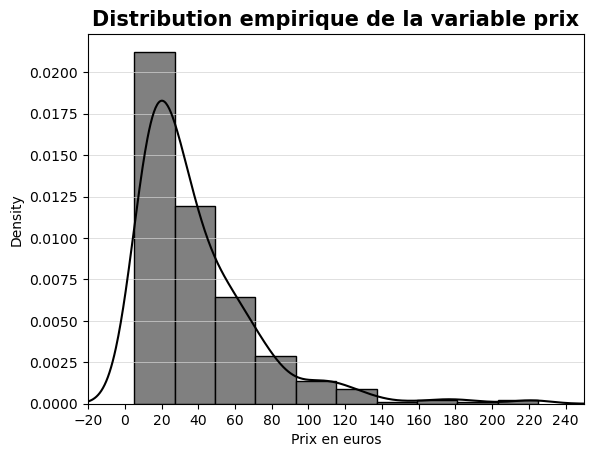

In [47]:
# Faire un histogramme et une courbe de densité 
axes = plt.gca()

distri_empirique['price'].hist(density=True,
                               bins=10, 
                               edgecolor="black", 
                               color='grey')
distri_empirique.price.plot.density(color="black")
plt.grid(color='lightgrey',
         linestyle='-', 
         axis='y', 
         linewidth=0.5)
plt.xlim(-20, 250)
plt.xticks(np.arange(-20, 260, step=20))
plt.xlabel('Prix en euros', fontsize=10)
plt.title('Distribution empirique de la variable prix', 
          fontsize=15, 
          fontweight='bold')
plt.show()

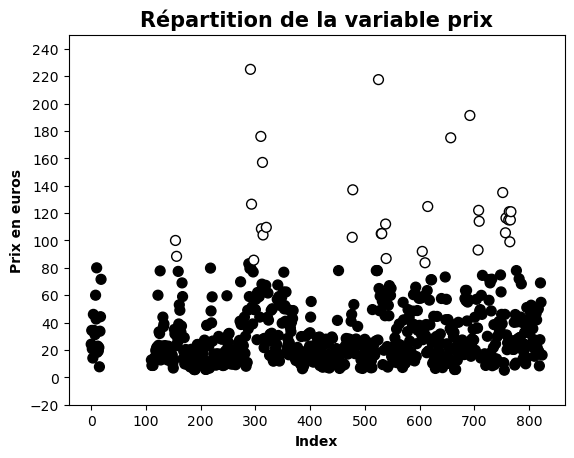

In [48]:
# Scatter Plot de la variable prix
z = data_melted_both['price'] > 83
plt.scatter(data_melted_both.index, 
            data_melted_both['price'], 
            c=z, 
            cmap="gray", 
            s=50, 
            edgecolor='black')
plt.title("Répartition de la variable prix", 
          fontsize=15, 
          fontweight='bold')
plt.xlabel('Index', 
           fontsize=10, 
           fontweight='bold')
plt.ylabel('Prix en euros', 
           fontsize=10, 
           fontweight='bold')
plt.ylim(-20, 250)
plt.yticks(np.arange(-20, 260, step=20))
plt.xticks(np.arange(0, 900, step=100))
plt.show()

<Figure size 3000x2500 with 0 Axes>

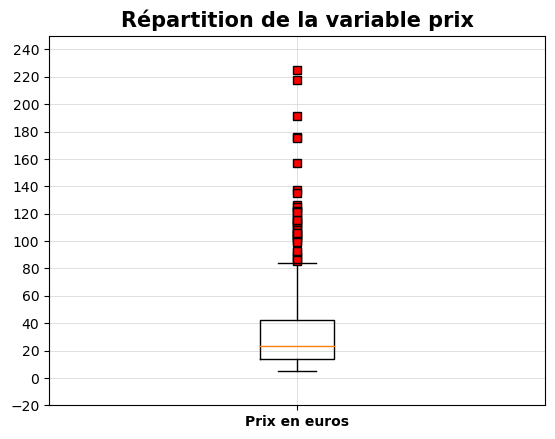

In [49]:
# BoxPlot de la variable prix
data = data_melted_both.price

fig5 = plt.figure(figsize=(30, 25))
red_square = dict(markerfacecolor='r', 
                  marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Répartition de la variable prix', 
              fontsize=15, 
              fontweight='bold')
ax5.boxplot(data, 
            vert=True, 
            flierprops=red_square)
plt.ylim(-20, 250)
plt.yticks(np.arange(-20, 260, step=20))
plt.xticks([1], ['Prix en euros'], 
            fontsize=10, 
            fontweight='bold')
plt.grid(color='lightgrey', 
         linestyle='-', 
         linewidth=0.5)
plt.show()

<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> 2 - Mesures de la tendance centrale</h3>
</div>

In [50]:
# Définir le mode 
mode = data_melted_both['price'].mode()
print(mode, "€ est la valeur la plus fréquente de la variable prix.")

0    19.0
Name: price, dtype: float64 € est la valeur la plus fréquente de la variable prix.


In [51]:
# définir la moyenne
mean = data_melted_both['price'].mean()
print('La moyenne est de', round(mean, 2), '€.')

La moyenne est de 32.49 €.


In [52]:
# définir la médiane
median = data_melted_both['price'].median()
print('La médiane est de', round(median, 2), '€.')

La médiane est de 23.55 €.


<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> 3 - Mesures de dispersion </h3>
</div>

In [53]:
# Calculer l'étendue
price_range = data_melted_both.price.max() - data_melted_both.price.min()
print('La valeur de l\'étendue est de', price_range,
      '. La valeur étant élevée, on peut dire que la série est hétérogène.')

La valeur de l'étendue est de 219.8 . La valeur étant élevée, on peut dire que la série est hétérogène.


In [54]:
# Calculer la variance empirique 
var = data_melted_both['price'].var(ddof=0)
print('La valeur de la variance empirique est de', round(var, 0),
      '. La valeur étant élevée, on peut en conclure que la dispersion '
      'des observations est importante. Toutefois, cette mesure étant '
      'sensible aux valeurs extrêmes, elle est peu pertinente ici.')

La valeur de la variance empirique est de 772.0 . La valeur étant élevée, on peut en conclure que la dispersion des observations est importante. Toutefois, cette mesure étant sensible aux valeurs extrêmes, elle est peu pertinente ici.


In [55]:
# Calculer l'écart-type empirique 
std = data_melted_both['price'].std()
print('La valeur de l\'écart-type empirique est de', round(std, 2),
      '. L\'écart-type est grand, les valeurs sont donc dispersées autour de la moyenne.')

limite_inferieure = data_melted_both.price.mean() - 3 * data_melted_both.price.std()
limite_superieure = data_melted_both.price.mean() + 3 * data_melted_both.price.std()
print('Avec la méthode de l\'écart-type, sont considérés comme outliers les valeurs hors de '
      'la fourchette :', round(limite_inferieure, 2), ' à ', round(limite_superieure, 2), '.')

La valeur de l'écart-type empirique est de 27.81 . L'écart-type est grand, les valeurs sont donc dispersées autour de la moyenne.
Avec la méthode de l'écart-type, sont considérés comme outliers les valeurs hors de la fourchette : -50.94  à  115.92 .


In [56]:
# Calculer le coef de variation 
coef = data_melted_both['price'].std() / data_melted_both['price'].mean() * 100
print('Le coef de variation est de', round(coef, 2),'%.',
      'Cela vient confirmer la dispersion des valeurs autour de la moyenne.')

Le coef de variation est de 85.59 %. Cela vient confirmer la dispersion des valeurs autour de la moyenne.


In [57]:
# Calculer l'écart interquartile
Q1 = np.quantile(data_melted_both.price, 0.25)
Q3 = np.quantile(data_melted_both.price, 0.75)
ecart_interquartile = Q3 - Q1
print('La valeur de l\'écart interquartile est de', round(ecart_interquartile,2),
      '.','Cela signifie que les valeurs sont dispersées autour de la médiane. '
      'C\'est une mesure peu sensible aux valeurs extrêmes, elle est donc '
      'pertinente dans notre analyse et vient confirmer la dispersion des valeurs de la variable.')

La valeur de l'écart interquartile est de 28.08 . Cela signifie que les valeurs sont dispersées autour de la médiane. C'est une mesure peu sensible aux valeurs extrêmes, elle est donc pertinente dans notre analyse et vient confirmer la dispersion des valeurs de la variable.


In [58]:
# Calculer la limite inférieure 
calcul = ecart_interquartile * 1.5
calcul2 = Q1 - calcul
calcul3 = Q3 + calcul
print('Les valeurs non comprises entre', round(calcul2, 0),
      'et', round(calcul3, 0), 'sont considérées comme des outliers mineurs.' )

Les valeurs non comprises entre -28.0 et 84.0 sont considérées comme des outliers mineurs.


In [59]:
# Calculer la limite supérieure
calcul4 = ecart_interquartile * 3
calcul5 = Q1 - calcul4
calcul6 = Q3 + calcul4
print('Les valeurs non comprises entre', round(calcul5, 0),
      'et', round(calcul6, 0), 'sont considérées comme des outliers majeurs.' )

Les valeurs non comprises entre -70.0 et 126.0 sont considérées comme des outliers majeurs.


In [60]:
# Isoler les outliers en fonction de la limite extérieure calculée ci-dessus
outliers = pd.DataFrame(data_melted_both.loc[data_melted_both['price'] > 126])
outliers.to_csv('outliers.csv')
outliers

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,total_CA
291,4352,15940,1,225.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1125.0
293,4355,12589,1,126.5,2,instock,0.0,0.0,0.0,0.0,...,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1391.5
310,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2288.0
313,4406,7819,1,157.0,3,instock,0.0,0.0,0.0,0.0,...,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
478,4904,14220,1,137.0,13,instock,0.0,0.0,0.0,0.0,...,2020-05-19 15:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,685.0
525,5001,14581,1,217.5,20,instock,0.0,0.0,0.0,0.0,...,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
657,5767,15185,1,175.0,12,instock,0.0,0.0,0.0,0.0,...,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
692,5892,14983,1,191.3,10,instock,0.0,0.0,0.0,0.0,...,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,573.9
752,6126,14923,1,135.0,10,instock,0.0,0.0,0.0,0.0,...,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,270.0


In [61]:
# Afficher outliers par l'écart interquartile
variables1 = ['product_id',
             'sku', 
             'post_title', 
             'onsale_web',
             'stock_status',
             'stock_quantity',
             'total_sales', 
             'price', 
             'total_CA']
outliers_ecart = outliers[variables1].sort_values(
    by = 'price',
    ascending = False).reset_index(drop = True)
outliers_ecart.head(20)

,product_id,sku,post_title,onsale_web,stock_status,stock_quantity,total_sales,price,total_CA
0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1,outofstock,0,5.0,225.0,1125.0
1,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014,1,instock,20,0.0,217.5,0.0
2,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1,instock,10,3.0,191.3,573.9
3,4402,3510,Cognac Frapin VIP XO,1,instock,8,13.0,176.0,2288.0
4,5767,15185,Camille Giroud Clos de Vougeot 2016,1,instock,12,0.0,175.0,0.0
5,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,1,instock,3,0.0,157.0,0.0
6,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,1,instock,13,5.0,137.0,685.0
7,6126,14923,Champagne Gosset Célébris Vintage 2007,1,instock,10,2.0,135.0,270.0
8,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1,instock,2,11.0,126.5,1391.5


In [62]:
# Isoler les outliers en fonction de la limite extérieure calculée ci-dessus
outliers_84 = pd.DataFrame(data_melted_both.loc[data_melted_both['price'] > 84])
outliers_84 = outliers_84[variables1].sort_values(
    by = 'price',
    ascending = False).reset_index(drop = True)
outliers_84.head(50)

,product_id,sku,post_title,onsale_web,stock_status,stock_quantity,total_sales,price,total_CA
0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1,outofstock,0,5.0,225.0,1125.0
1,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014,1,instock,20,0.0,217.5,0.0
2,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1,instock,10,3.0,191.3,573.9
3,4402,3510,Cognac Frapin VIP XO,1,instock,8,13.0,176.0,2288.0
4,5767,15185,Camille Giroud Clos de Vougeot 2016,1,instock,12,0.0,175.0,0.0
5,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,1,instock,3,0.0,157.0,0.0
6,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,1,instock,13,5.0,137.0,685.0
7,6126,14923,Champagne Gosset Célébris Vintage 2007,1,instock,10,2.0,135.0,270.0
8,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1,instock,2,11.0,126.5,1391.5
9,5612,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...,1,instock,12,0.0,124.8,0.0


<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> 4 - Mesures de forme </h3>
</div>

In [63]:
# Calcul du skewness empirique
skew = data_melted['price'].skew()
print('La valeur du skewness empirique est de', round(skew, 2),
      '. On parle alors d\'une distribution étalée à droite.' )

La valeur du skewness empirique est de 2.61 . On parle alors d'une distribution étalée à droite.


In [64]:
# Calcul du kurtosis
kurtosis = data_melted['price'].kurtosis()
print('Le coefficiant de Fisher étant supérieur à 3',
      '(', round(kurtosis, 2), '), on parle ici de distribution '
      'leptokurtique : une distribution plus longue et une queue '
      'épaisse, ce qui signifie qu\'elle contient beaucoup d\'outliers.')

Le coefficiant de Fisher étant supérieur à 3 ( 10.56 ), on parle ici de distribution leptokurtique : une distribution plus longue et une queue épaisse, ce qui signifie qu'elle contient beaucoup d'outliers.


<div style="border: 1px solid RGB(127,23,52);" >
<h3 style="margin: auto; padding: 20px; color: RGB(127,23,52); "> 5 - Z-score </h3>
</div>

In [65]:
# Determiner le Z-score avec Scipy
data_z = data_melted_both.price
z_score = pd.DataFrame(data_melted_both)
z_score['z_score'] = stats.zscore(data_z)
z_score.sort_values(by="z_score")

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,total_CA,z_score
755,6129,14570,1,5.2,30,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,-0.982084
189,4173,16211,1,5.7,100,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,74.1,-0.964093
664,5777,14338,1,5.7,132,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,-0.964093
188,4172,16210,1,5.7,167,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,245.1,-0.964093
190,4174,16209,1,5.7,94,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,34.2,-0.964093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,5767,15185,1,175.0,12,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,5.127798
310,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2288.0,5.163781
692,5892,14983,1,191.3,10,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,573.9,5.714318
525,5001,14581,1,217.5,20,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,6.657068


<Figure size 3000x2500 with 0 Axes>

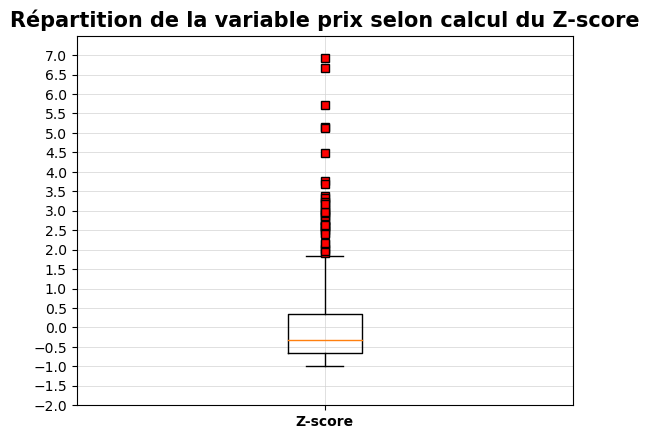

In [66]:
# Boxplot du Z-score
data = z_score.z_score

fig5 = plt.figure(figsize=(30, 25))
red_square = dict(markerfacecolor='r',
                  marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Répartition de la variable prix selon calcul du Z-score', 
              fontsize=15, 
              fontweight='bold')
ax5.boxplot(data, 
            vert=True, 
            flierprops=red_square)
plt.ylim(-2, 7.5)
plt.yticks(np.arange(-2, 7.5, step=0.5))
plt.xticks([1], 
           ['Z-score'], 
           fontsize=10, 
           fontweight='bold')
plt.grid(color='lightgrey',
         linestyle='-', 
         linewidth=0.5)
plt.show()

In [67]:
# Isoler les outliers mis en lumière par le Z-score
z_score_outliers = z_score.loc[z_score['z_score'] >= 3]
z_score_outliers.to_csv('z_score_outliers.csv')
z_score_outliers

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,total_CA,z_score
291,4352,15940,1,225.0,0,outofstock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1125.0,6.926939
293,4355,12589,1,126.5,2,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1391.5,3.382632
310,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2288.0,5.163781
313,4406,7819,1,157.0,3,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,4.480108
478,4904,14220,1,137.0,13,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,685.0,3.760451
525,5001,14581,1,217.5,20,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,6.657068
615,5612,14915,1,124.8,12,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,3.321461
657,5767,15185,1,175.0,12,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,5.127798
692,5892,14983,1,191.3,10,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,573.9,5.714318
708,5917,14775,1,122.0,4,instock,0.0,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,3.220709


In [68]:
# Afficher outliers par z-score
outliers_z_score = z_score_outliers[variables1].sort_values(
    by = 'price',
    ascending = False).reset_index(drop = True)
outliers_z_score.head(20)

,product_id,sku,post_title,onsale_web,stock_status,stock_quantity,total_sales,price,total_CA
0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1,outofstock,0,5.0,225.0,1125.0
1,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014,1,instock,20,0.0,217.5,0.0
2,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1,instock,10,3.0,191.3,573.9
3,4402,3510,Cognac Frapin VIP XO,1,instock,8,13.0,176.0,2288.0
4,5767,15185,Camille Giroud Clos de Vougeot 2016,1,instock,12,0.0,175.0,0.0
5,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,1,instock,3,0.0,157.0,0.0
6,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,1,instock,13,5.0,137.0,685.0
7,6126,14923,Champagne Gosset Célébris Vintage 2007,1,instock,10,2.0,135.0,270.0
8,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1,instock,2,11.0,126.5,1391.5
9,5612,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...,1,instock,12,0.0,124.8,0.0


In [69]:
# Isoler les outliers mis en lumière par le Z-score
z_score_outliers_15 = z_score.loc[z_score['z_score'] >= 1.5]
z_score_outliers_15 = z_score_outliers_15[variables1].sort_values(
    by = 'price',
    ascending = False).reset_index(drop = True)
z_score_outliers_15

,product_id,sku,post_title,onsale_web,stock_status,stock_quantity,total_sales,price,total_CA
0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1,outofstock,0,5.0,225.0,1125.0
1,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014,1,instock,20,0.0,217.5,0.0
2,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1,instock,10,3.0,191.3,573.9
3,4402,3510,Cognac Frapin VIP XO,1,instock,8,13.0,176.0,2288.0
4,5767,15185,Camille Giroud Clos de Vougeot 2016,1,instock,12,0.0,175.0,0.0
5,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,1,instock,3,0.0,157.0,0.0
6,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...,1,instock,13,5.0,137.0,685.0
7,6126,14923,Champagne Gosset Célébris Vintage 2007,1,instock,10,2.0,135.0,270.0
8,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1,instock,2,11.0,126.5,1391.5
9,5612,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...,1,instock,12,0.0,124.8,0.0


In [70]:
# Calcul du Z-score
moyenne = data_melted_both.price.mean()
ecart_type = data_melted_both.price.std()
z_score_calcul = pd.DataFrame(data_melted_both.price)
z_score_calcul['z_score'] = (data_melted_both.price - moyenne) / ecart_type
z_score_calcul.sort_values(by='z_score', ascending=False)

,price,z_score
291,225.0,6.922087
525,217.5,6.652405
692,191.3,5.710315
310,176.0,5.160164
657,175.0,5.124206
...,...,...
189,5.7,-0.963417
190,5.7,-0.963417
188,5.7,-0.963417
664,5.7,-0.963417


<Figure size 3000x2500 with 0 Axes>

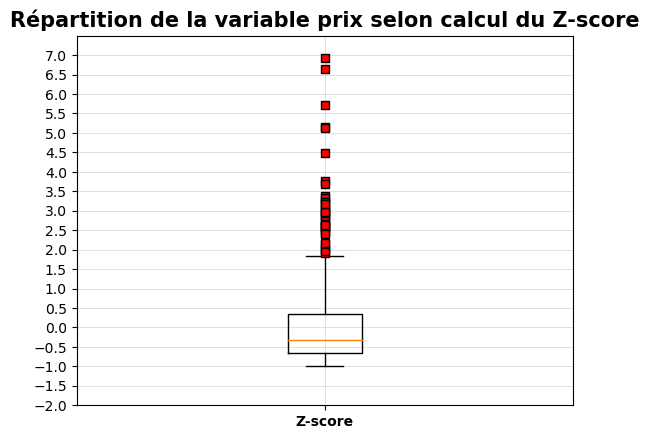

In [71]:
# Boxplot du Z-score
data = z_score_calcul.z_score

fig5 = plt.figure(figsize=(30, 25))
red_square = dict(markerfacecolor='r',
                  marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Répartition de la variable prix selon calcul du Z-score', 
              fontsize=15, 
              fontweight='bold')
ax5.boxplot(data, 
            vert=True, 
            flierprops=red_square)
plt.ylim(-2, 7.5)
plt.yticks(np.arange(-2, 7.5, step=0.5))
plt.xticks([1], 
           ['Z-score'], 
           fontsize=10, 
           fontweight='bold')
plt.grid(color='lightgrey', 
         linestyle='-', 
         linewidth=0.5)
plt.show()

In [72]:
# Etat des stocks des SKU dont statut = en stock (vérifiaction si stock = 0)
instock = data_melted_both.loc[(data_melted_both['stock_status']) == 'instock']
instock.stock_quantity.value_counts().sort_values(ascending= False)

1      32
6      22
12     20
2      19
7      19
       ..
129     1
203     1
72      1
76      1
40      1
Name: stock_quantity, Length: 126, dtype: int64